*** 1 Линейные системы уравнений. Устойчивость численных методов. ***

Получите численное решение «жесткой» системы уравнений

u'= - 29u - 72v

v' = - 72u - 71v

u(0) =v(0) =1.

Матрица **А** системы:  $A= \begin{pmatrix}  -29 & -72\\  -72 & -71 \end{pmatrix}$



и сравните с точным решением. Для численного решения использовать:
* 1) явный и неявный методы Эйлера, 
* 2) метод Эйлера с центральной точкой, 
* 3) метод трапеций, 
* 4) метод Рунге-Кутты четвертого порядка аппроксимации. 

Получить «эталонное» решение с помощью метода
Дормана-Принца.

Априорно оценить шаги, для которых используемые методы будут устойчивыми (кроме метода Дормана-Принца).

***Указание.*** Для исследования на устойчивость перейти в базис из собственных векторов матрицы системы ОДУ. Какой шаг интегрирования необходимо взять, чтобы численное решение было устойчивым? Сравнить полученное Вами оцененное значение с тем, при котором метод
теряет устойчивость в расчетах. 

Провести расчеты по методу с автоматическим выбором шага. Объяснить полученные результаты.

<center >  **Решение** </center > 

**A** - симметричная

Систему можно записать в виде: 

**x'=Ax**

$\begin{pmatrix}  u'\\  v' \end{pmatrix}= \begin{pmatrix}  -29 & -72\\  -72 & -71 \end{pmatrix} \begin{pmatrix}  u\\  v \end{pmatrix}=\mathbf{f(x)}$

$\begin{pmatrix}  u(0)\\  v(0) \end{pmatrix}= \begin{pmatrix}  1\\  1 \end{pmatrix} = \mathbf{x}(0)$

т.е. здесь $u=u(t), v=v(t)$

 Найдем собственные числа и собственные вектора матрицы: $λ_1=-125, λ_2=25$
 
$\nu_1= \begin{pmatrix}  3\\  4\end{pmatrix}$, $\nu_2= \begin{pmatrix}  -4\\  3\end{pmatrix}$, 

Тогда точное решение нашей ЖС ОДУ:

$\begin{pmatrix}  u\\  v\end{pmatrix} = C_1 \begin{pmatrix}  3\\  4\end{pmatrix} e^{-125 t} + C_2 \begin{pmatrix}  -4\\  3\end{pmatrix}e^{25 t}$

Из начальных условий определим коэффициенты: $С_1=\frac{7}{25}, С_2=-\frac{1}{25}$

In [68]:
'''
Реализации функций взяты с репозитория на гитхабе: https://github.com/stdereka/calc_math_hometask/blob/master/spellbook.py
Также ниже виден список подключенных библиотек
'''

'\nРеализации функций взяты с репозитория на гитхабе: https://github.com/stdereka/calc_math_hometask/blob/master/spellbook.py\nТакже ниже виден список подключенных библиотек\n'

In [69]:


import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from sympy import diff, symbols, Symbol, integrate, solve, sqrt, log, sin, cos, lambdify
from scipy.integrate import *
#from scipy.integrate import solve_ivp
from functions import *
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
C1=7/25
C2=-1/25
nu1=np.matrix('3 ;4')
nu2=np.matrix('-4 ;3')

def exact_sol_f(t):
    return C1*nu1*np.exp(-125*t)+C2*nu2*np.exp(25*t)

In [51]:
pri=[]
for t in range(1, 301):
    pri.append(exact_sol_f(t))
pri=np.array(pri)

C:\Users\Рита\Documents\Computer1\WinPython-64bit-3.5.2.3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in exp


In [21]:
def plot_line_2D(axes, solution, leg=True):
    axes.plot(solution[1], solution[2], 'b-')
    axes.plot(solution[1][0], solution[2][0], 'gp')
    axes.plot(solution[1][-1], solution[2][-1], 'rp')
    if leg:
        axes.legend(['Solution curve', '$t=t_0$', '$t=t_{max}$'])
    
def plot_lines_2D(axes, *solutions, leg=True):
    for solution in solutions:
        plot_line_2D(axes, solution, leg)

In [37]:
# наша система 
system_of_eq = lambda t, x: np.array([
    1.0,
    -2*x[1]+x[2],
    x[1]-2*x[2],
])

# НУ
x_start = np.array([1.0, 1.0, 1.0])
t_stop = 201.0

# Эталонное решение - Метод Дормана - Принса
#prince = solve_ivp(system_of_eq, (x_start[0], t_stop), x_start.copy(), method='RK45', t_eval=np.arange(x_start[0], t_stop, 0.01)).y

In [34]:
# Явный метод Эйлера
m1 = euler_explicit
# Неявный метод Эйлера
m2 = euler_implicit
# Метод Эйлера с центральной точкой
m3 = euler_central_point
# РК 1 порядка
m5 = RungeExplicit(np.array([[0,0],[0,1]]))
# РК 4 порядка
m4 = RungeExplicit(np.array([[0,0,0,0,0],[0.5,0.5,0,0,0],[0.5,0,0.5,0,0],[1,0,0,1,0],[0,1/8,3/8,3/8,1/8]]))

**Явный метод Эйлера**

Посторим графики найденных решений при разных h.

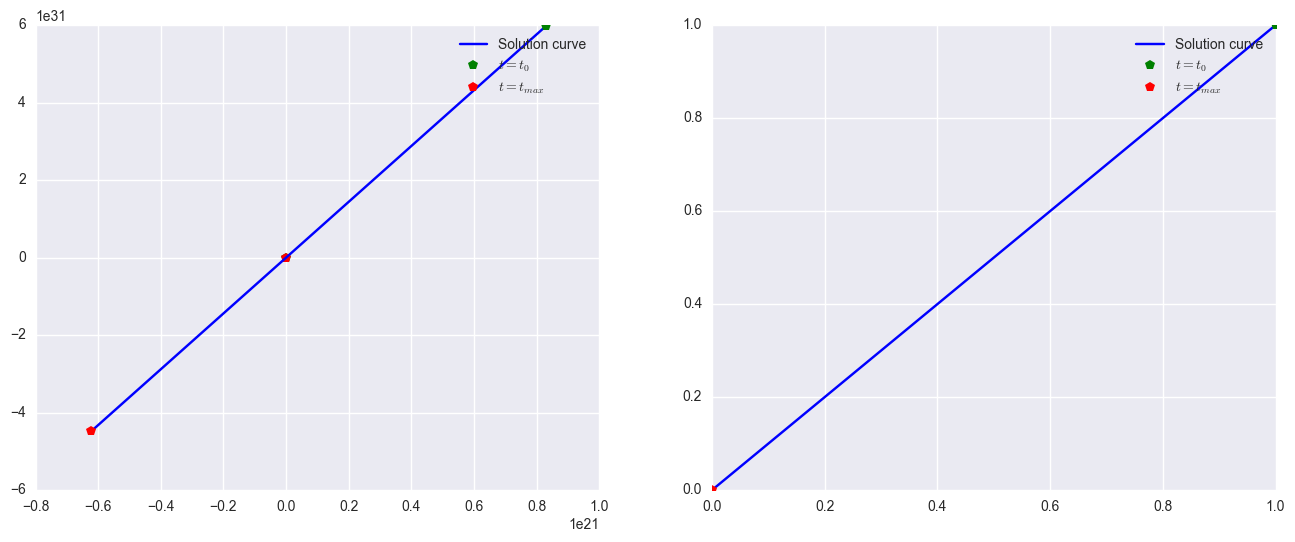

In [47]:
h = 0.001
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m1(lambda x: system_of_eq(0, x),  x_start, t_stop, h))
h = 0.5
plot_lines_2D(axes[1], m1(lambda x: system_of_eq(0, x),  x_start, t_stop, h))

**Неявный метод Эйлера**

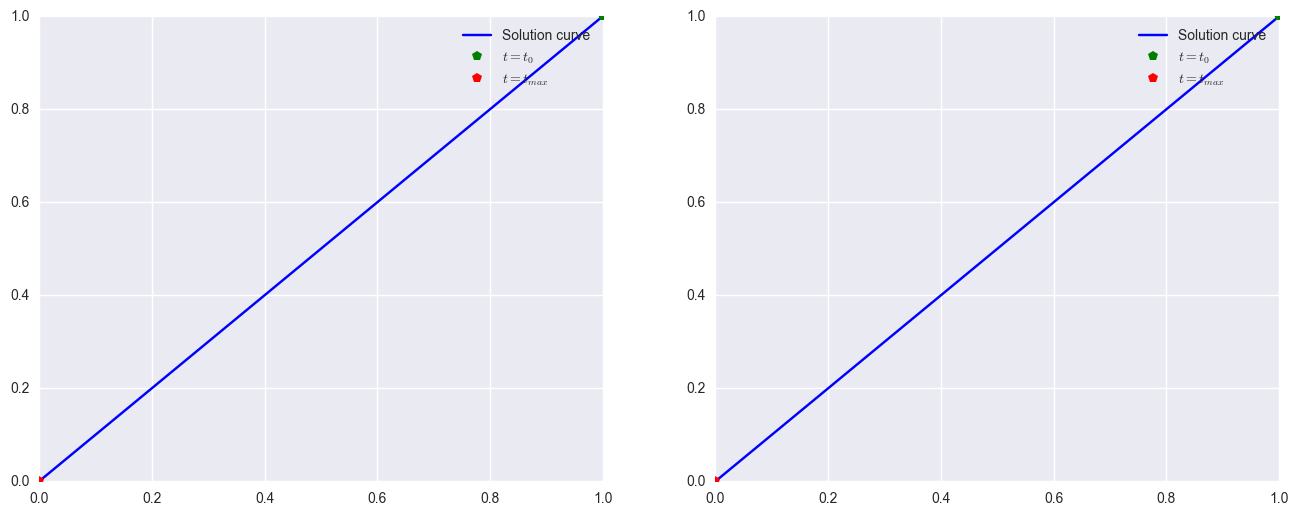

In [41]:
h = 0.001
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m2(lambda x: system_of_eq(0, x),  x_start, t_stop, h))
h = 0.67
plot_lines_2D(axes[1], m2(lambda x: system_of_eq(0, x),  x_start, t_stop, h))

**Метод Эйлера с центральной точкой**

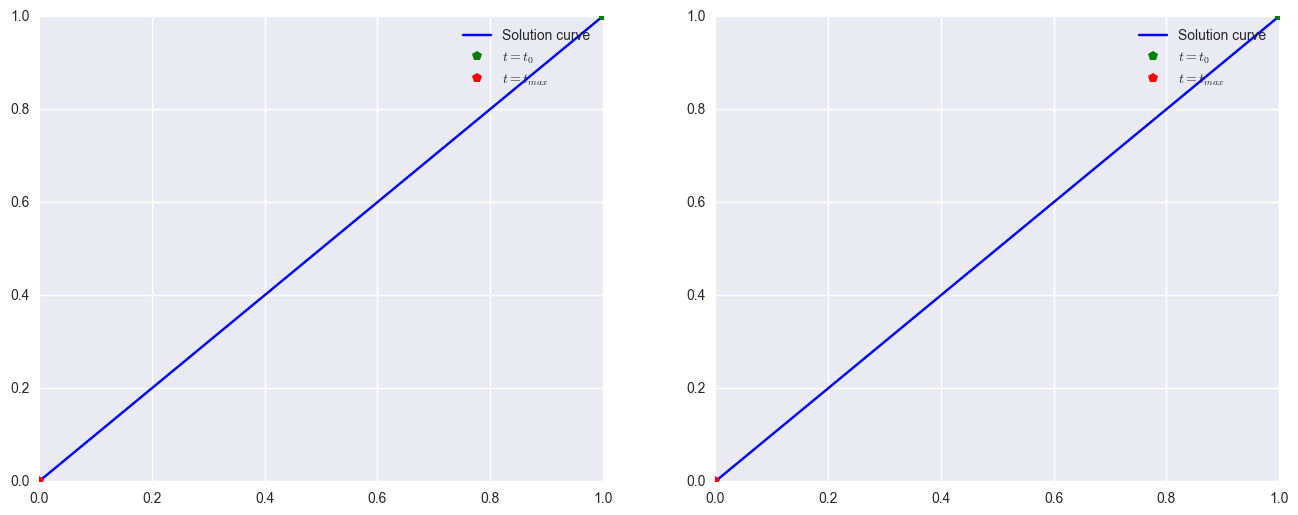

In [43]:
h = 0.001
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m3(lambda x: system_of_eq(0, x),  x_start, t_stop, h))
h = 0.67
plot_lines_2D(axes[1], m3(lambda x: system_of_eq(0, x),  x_start, t_stop, h))

**Метод Рунге-Кутта 1 порядка**

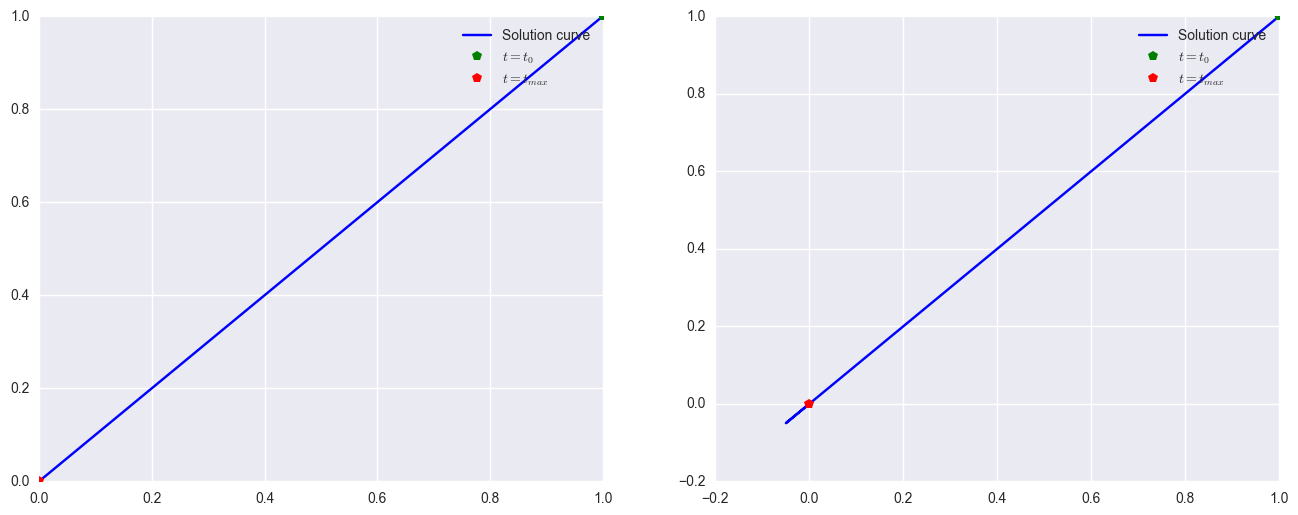

In [53]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m5(lambda x: system_of_eq(0, x),  x_start, t_stop, h))
h = 1.05
plot_lines_2D(axes[1], m5(lambda x: system_of_eq(0, x),  x_start, t_stop, h))

**Метод Рунге-Кутта 4 порядка**

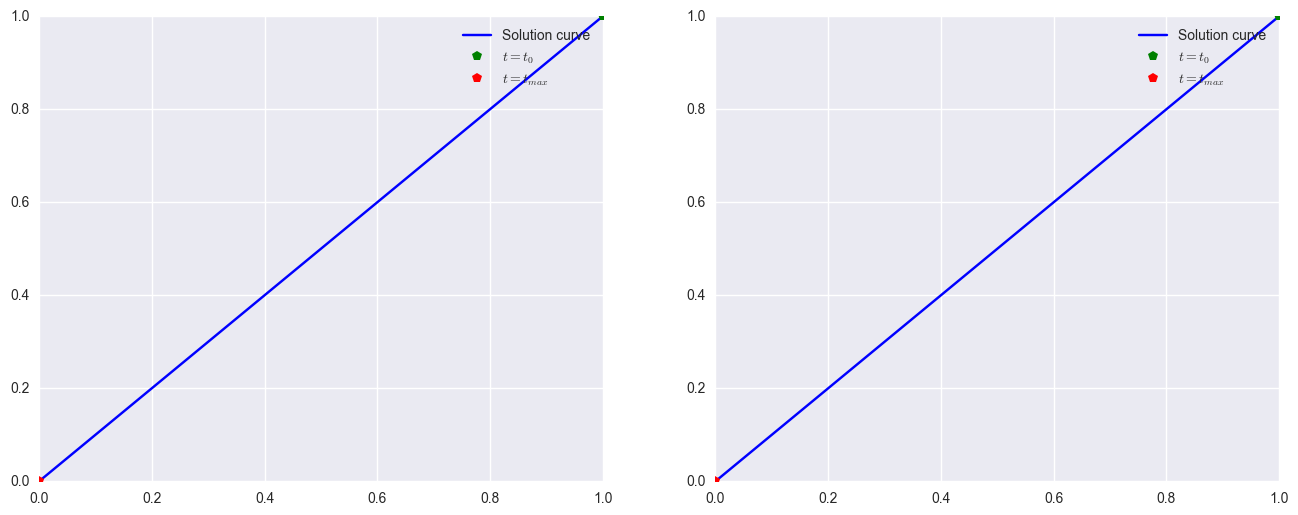

In [54]:
h = 0.01
fig, axes = plt.subplots(1,2, figsize=(16, 6))
plot_lines_2D(axes[0], m4(lambda x: system_of_eq(0, x),  x_start, t_stop, h))
h = 1.05
plot_lines_2D(axes[1], m4(lambda x: system_of_eq(0, x),  x_start, t_stop, h))

Запишем также еще численные решения:

In [55]:
E=np.matrix('1 0; 0 1')
def Euler_implicit(n, h, x0, t0=0):
    rA=np.matrix.getI(E-h*A)
    x=x0
    t=t0
    for i in range(n):
        x = rA*x
        t += h;
    return t, x # решение

In [57]:
print(exact_sol_f(0.5))

[[ 42933.96584334]
 [-32200.4743825 ]]


In [59]:
x0=np.matrix('1.;1.')
A=np.matrix('-29 -72; -72 -71')

print(Euler_implicit(50000, 0.00001, x0, 0))

(0.5000000000003593, matrix([[ 43001.11380232],
        [-32250.83535174]]))


In [60]:
# n - количество итераций, h - шаг, (t, x) - начальная точка
def Euler_explicit(n, h, x0, t0=0):
    x=x0
    t=t0
    for i in range(n):
        x += h * (A*x)
        t += h;
    return t, x # решение

In [61]:
sol=[]
tau=0.01
T=[]
T=[n*tau for n in range(10)]

for i in range(10):
    sol.append(exact_sol_f(T[i]))

In [62]:
print(exact_sol_f(0.5))

[[ 42933.96584334]
 [-32200.4743825 ]]


In [63]:
x0=np.matrix('1.;1.')
print(Euler_explicit(500, 0.001, x0, 0))

(0.5000000000000003, matrix([[ 36817.36292271],
        [-27613.02219203]]))


In [64]:
x0=np.matrix('1.;1.')
def Euler_midpoint(n, h, x0, x1=x0, t0=0):
    t=t0
    for i in range(n):
        x1_old=x1
        x1 = 2*h*(A*x1)+x0
        t += h
        x0=x1_old
    return t, x1 # решение

In [65]:
print(exact_sol_f(0.5))

[[ 42933.96584334]
 [-32200.4743825 ]]


In [67]:
print(Euler_midpoint(50000, 0.00001, x0))

(0.5000000000003593, matrix([[  7.30850189e+23],
        [  9.74466919e+23]]))


Вывод: 

Перебирая разные значения шага h, можно заметить, что явный метод Эйлера не сходится к точному решению ЖС ОДУ. Но неявный метод Эйлера и метод Эйлера с центральной точкой стремятся к значению точного решения при уменьшении шага h.

**2 Нелинейная система уравнений**

Решаем систему методами Адамса разных порядков аппроксимации (2, 3 и 4), при b =1, 2,8 / 3, 10, 20. Считаем, что 0 < t <50.

In [30]:
system_of_eq = lambda b, x: np.array([
    1.0,
    10*x[2]-10*x[1],
    -x[1]*x[3]+28*x[1]-x[2],
    x[1]*x[2]-b*x[3],
])

x_start = np.array([1.0, 1.0, 1.0, 1.0])
t_stop = 51.0
h = 0.001

In [31]:
#решения
B = [1,2,8/3,10,20]
solutions = [(method(lambda x: system_of_eq(b, x),  x_start, t_stop, h), b, method, proj) for method in [adams_2, adams_3, adams_4] for proj in [(0,1,2),(0,1,3),(0,2,3)] for b in B]


Рассмотрим проеции полученных решений на всевозможные плоскости (в 3-мерном пространстве), для всех b и всех порядков аппроксимации:

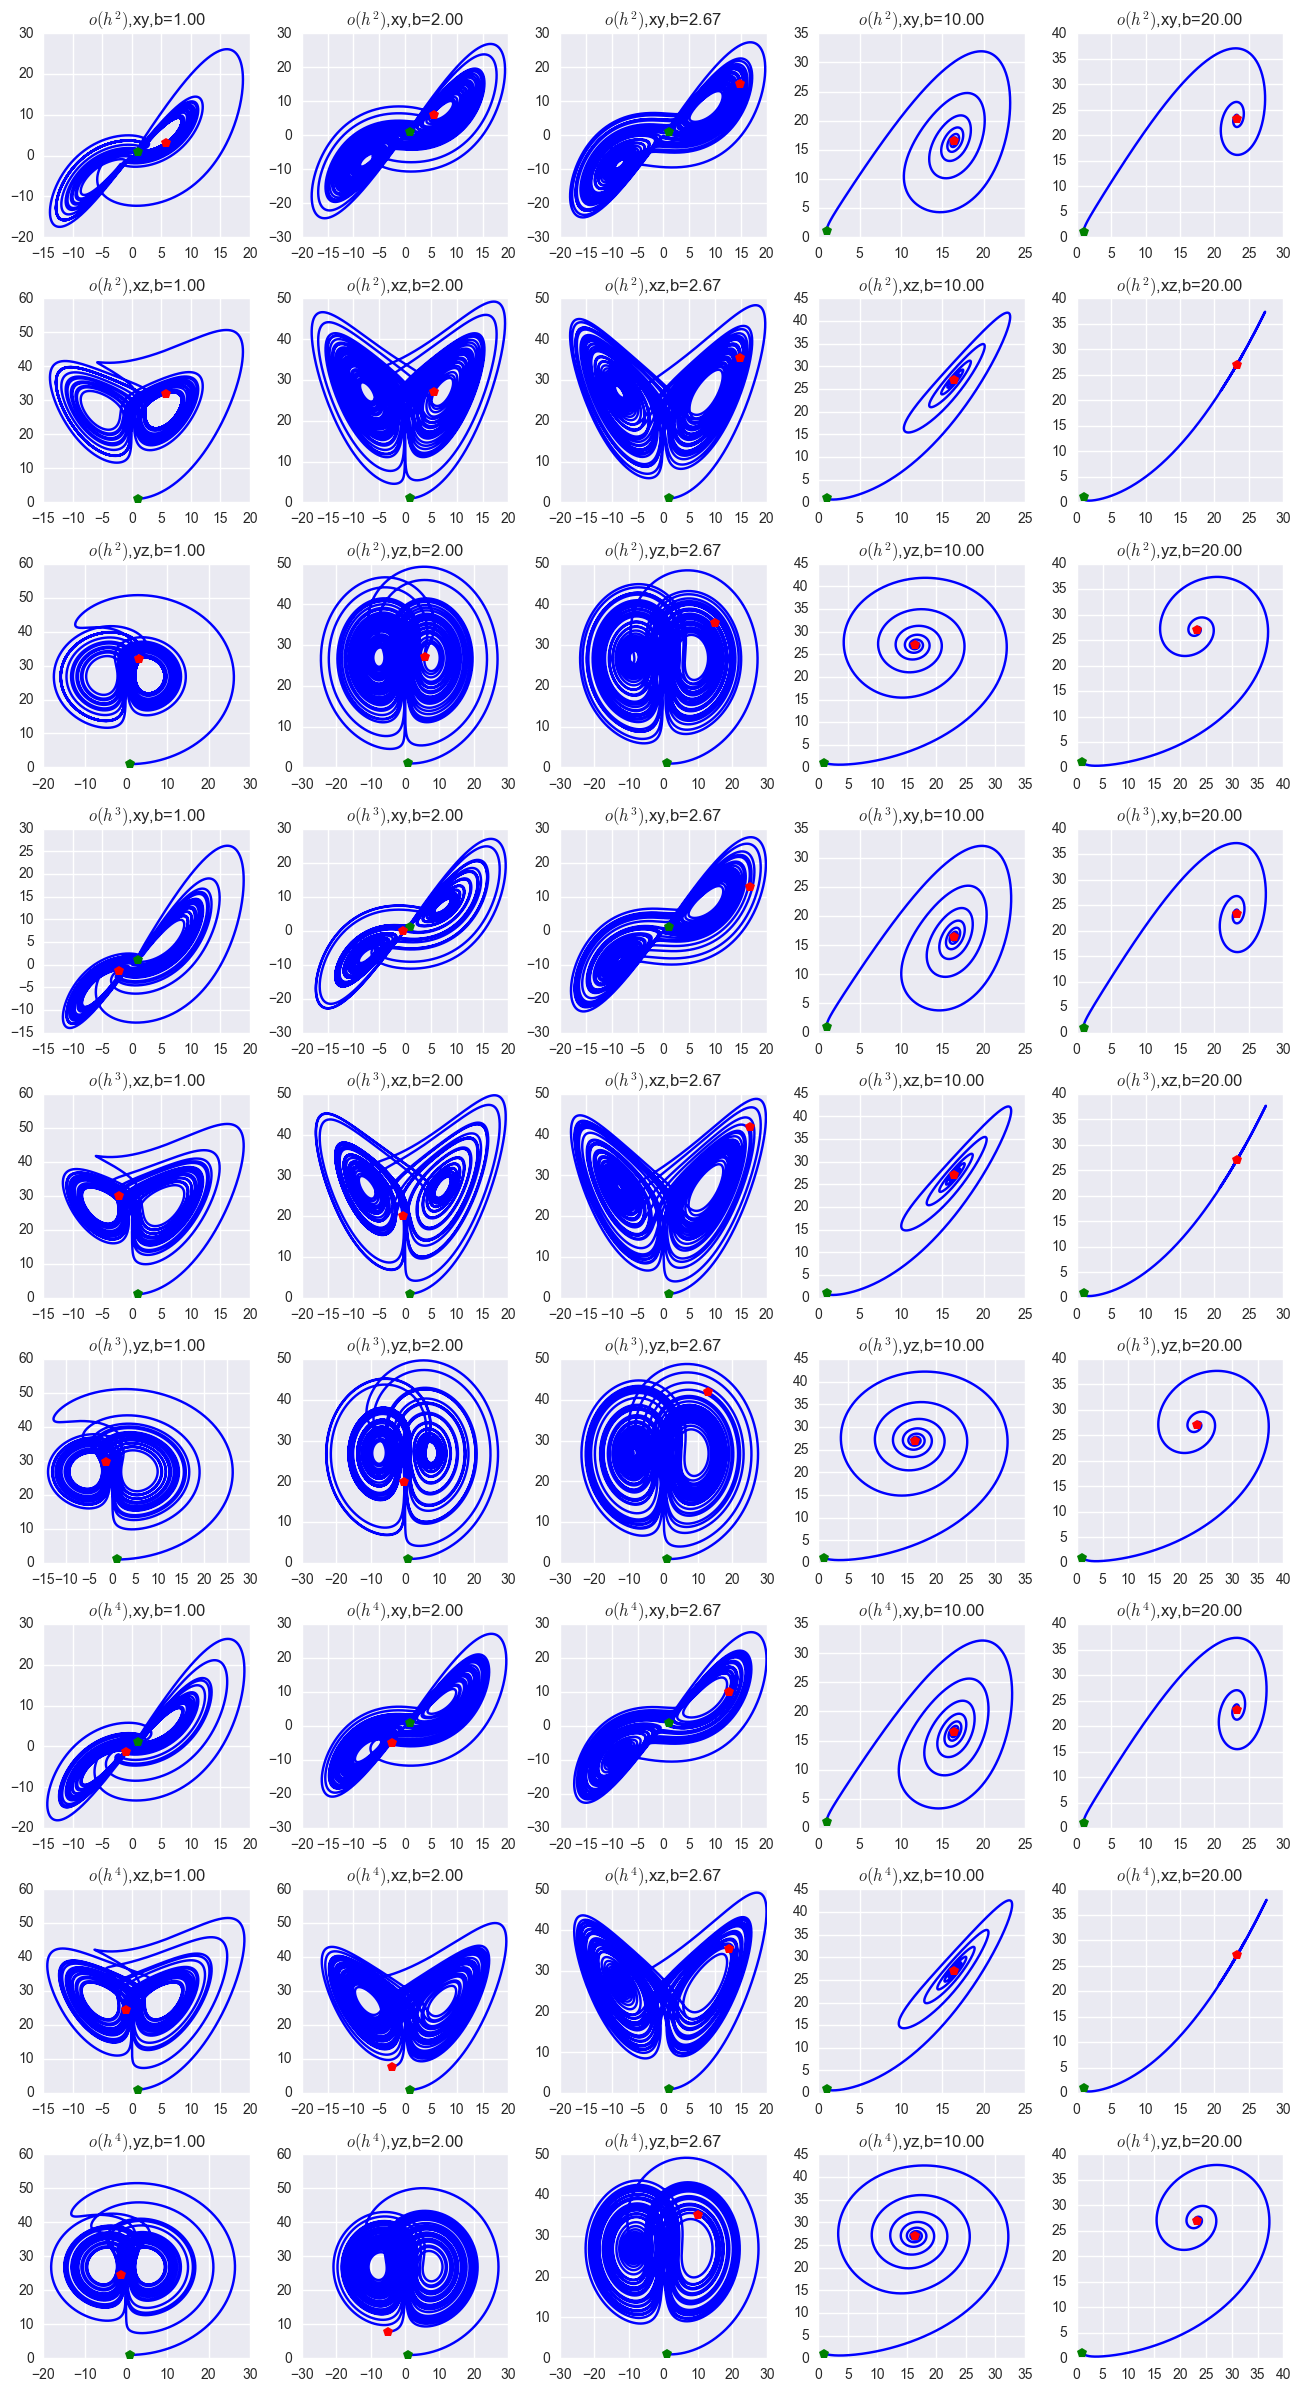

In [32]:
M = {adams_2:'$o(h^2)$', adams_3:'$o(h^3)$', adams_4:'$o(h^4)$'}
P = {(0,1,2):'xy',(0,1,3):'xz',(0,2,3):'yz'}
fig, axes = plt.subplots(9, 5, figsize=(16, 30))
plt.subplots_adjust(wspace=0.25, hspace=0.3)
axes = axes.flatten()
for i in range(0,len(axes)):
    sol, b, method, proj = solutions[i]
    plot_lines_2D(axes[i], sol[proj, :], leg=False)
    axes[i].set_title(M[method]+','+P[proj]+',b={:.2f}'.format(b))

Из графиков видно, что при увеличении $b$ происходит слияние двух особых точек в одну. Решения имеют схожий вид для всех указанных порядков аппроксимации.

Рассмотрим как со временем меняется ошибка между различными порядками апроксимации. 

Сравним второй и третий метод при $b=10$:

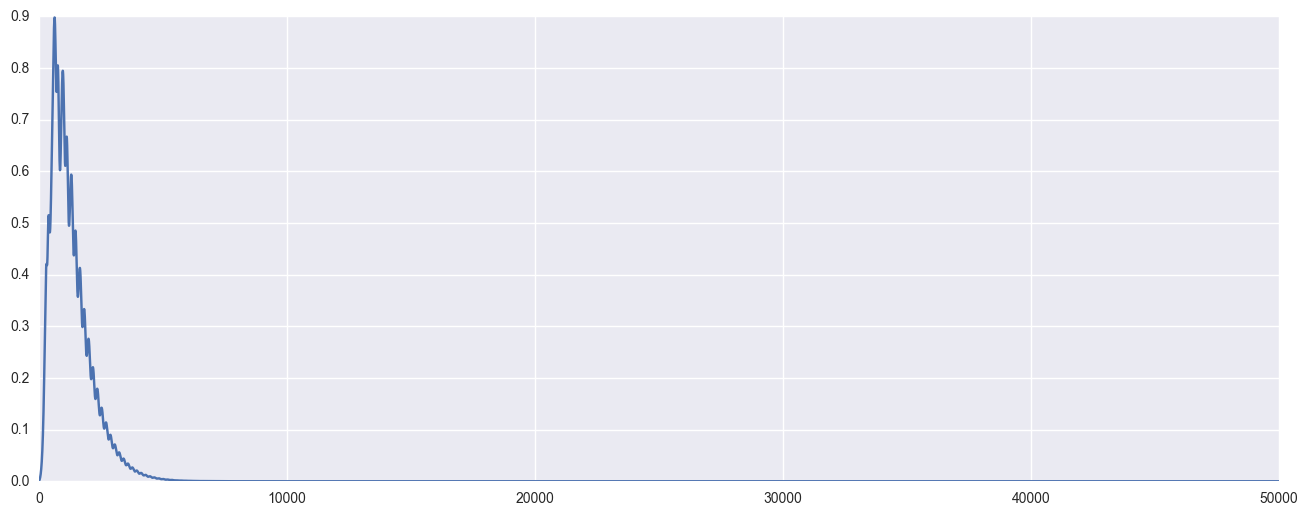

In [29]:
differ = [np.linalg.norm(x1-x2, ord=2) for x1, x2 in np.stack((solutions[3][0].T[:,1:], solutions[18][0].T[:,1:]), axis =1)]

plt.figure(figsize=(16, 6))
plt.plot(differ[10:])
plt.show()

Сравним второй и третий метод при $b=3/8$:

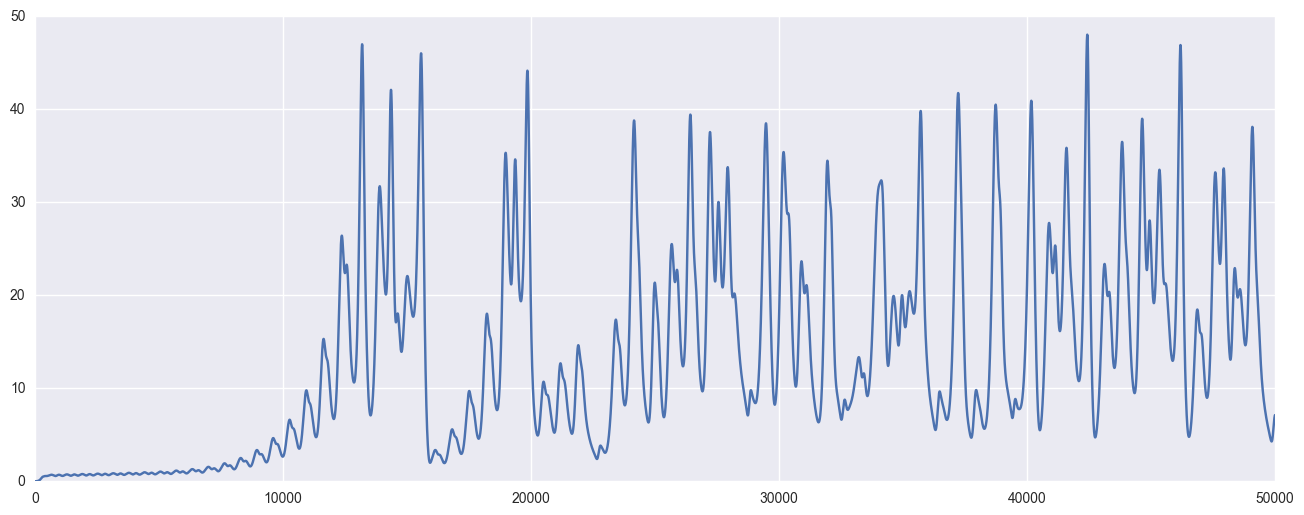

In [14]:
differ = [np.linalg.norm(x1-x2, ord=2) for x1, x2 in np.stack((solutions[2][0].T[:,1:], solutions[17][0].T[:,1:]), axis =1)]

plt.figure(figsize=(16, 6))
plt.plot(differ[10:])
plt.show()

Вывод: 

Эти методы являются устойчивыми. В первом случае решение (для всех порядков апроксимации) стремится к единственной особой точке, так что и различие стремится к нулю. Во втором случае в решении получается две особенности (и решение находится вокруг них), поэтому ошибка равна некоторому отличному от нуля среднему.

**3 Особые точки и особые траектории.**

In [15]:
#запишем систему ДУ
system_of_eq = lambda t, x: np.array([
    1.0,
    x[2],
    x[1]**2-1.0
])

t_stop = 101.0
h = 0.1

In [16]:
# Генерируем НУ
n_points = 100
x1, y1 = np.random.normal(1, 3, n_points),  np.random.normal(0, 3, n_points)
x2, y2 = np.random.normal(-1, 3, n_points),  np.random.normal(0, 3, n_points)
x3, y3 = np.random.normal(1.5, 2, n_points*2),  np.random.normal(-1, 2, n_points*2)
x0 = np.vstack((np.ones(n_points*4), np.hstack((x1, x2, x3)), np.hstack((y1, y2, y3)))).T

In [17]:
# Рунге-Кутт 1-го порядка
r1 = RungeExplicit(np.array([[0,0],[0,1]]))
# Рунге-Кутт 4-го порядка
r4 = RungeExplicit(np.array([[0,0,0,0,0],[0.5,0.5,0,0,0],[0.5,0,0.5,0,0],[1,0,0,1,0],[0,1/8,3/8,3/8,1/8]]))

Построим фазовые траектории системы для метода РК 1 порядка:

In [26]:
solutions = [r1(lambda x: system_of_eq(0, x),  x_s, t_stop, h) for x_s in x0]

C:\Users\Рита\Documents\Computer1\WinPython-64bit-3.5.2.3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars


(-3, 3)

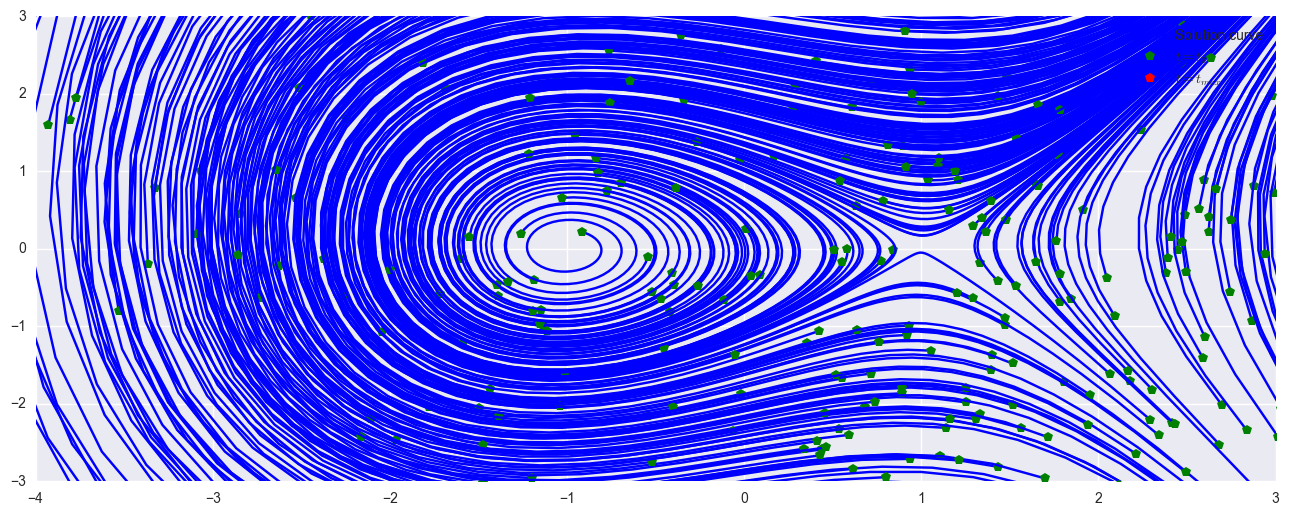

In [27]:
fig, axes = plt.subplots(1, figsize=(16, 6))
plot_lines_2D(axes, *solutions)
axes.set_xlim(-4,3)
axes.set_ylim(-3,3)

Построим фазовые траектории системы для метода РК 4 порядка:

In [18]:
solutions = [r4(lambda x: system_of_eq(0, x),  x_s, t_stop, h) for x_s in x0]

C:\Users\Рита\Documents\Computer1\WinPython-64bit-3.5.2.3\python-3.5.2.amd64\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Рита\Documents\Computer1\WinPython-64bit-3.5.2.3\notebooks\Вычматы\functions.py:82: RuntimeWarning: invalid value encountered in multiply
  addition[1:] += h*K[j]*self.betas[i, j]


(-3, 3)

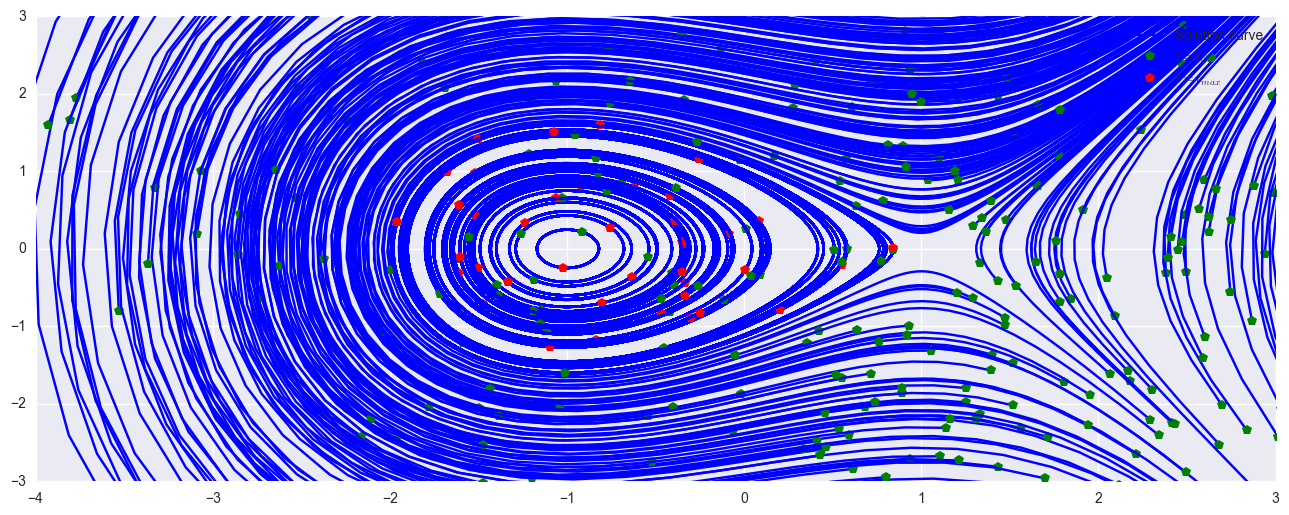

In [22]:

fig, axes = plt.subplots(1, figsize=(16, 6))
plot_lines_2D(axes, *solutions)
axes.set_xlim(-4,3)
axes.set_ylim(-3,3)

Вывод:
 
Как видно из графиков, при использовании метода Рунге-Кутта 1 порядка решения вокруг особой точки типа центр оказались неустойчивыми. (метод Рунге-Кутта 1 порядка не сохраняет первые интегралы системы)